In [2]:
# Dự đoán điểm xếp hạng phim bằng KNN

## 1. Đọc dữ liệu và kiểm tra giá trị thiếu

#python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time


# Đọc dữ liệu từ file CSV
file_path = 'cleaned_data.csv'
data = pd.read_csv(file_path)

In [3]:
# Loại bỏ các cột không cần thiết
data.drop(columns=['endYear', 'directors', 'writers'], inplace=True)

In [4]:
from sklearn.model_selection import train_test_split

# Chọn các đặc trưng và nhãn
features = ['isAdult', 'startYear', 'runtimeMinutes', 'titleLength', 'numGenres', 'numVotes', 'writerCount']
X = data[features]
y = data['averageRating']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra kích thước của các tập dữ liệu
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(56621, 7) (14156, 7) (56621,) (14156,)


In [5]:
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Khởi tạo mô hình KNN, với k chọn ngẫu nhiên là k = 5
knn = KNeighborsRegressor(n_neighbors=5)

# Huấn luyện mô hình
knn.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred = knn.predict(X_test_scaled)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('R-squared (R²):', r2)

Mean Squared Error (MSE): 1.23135936705284
R-squared (R²): 0.33662778827008233


In [8]:
# Phạm vi các giá trị k cần thử
k_range = range(1, 102, 2)

# Khởi tạo danh sách lưu trữ lỗi và thời gian
errors = []
train_times = []

for k in k_range:
    # Khởi tạo mô hình KNN với k hàng xóm
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Ghi lại thời gian bắt đầu huấn luyện
    start_time = time.time()
    
    # Huấn luyện mô hình
    knn.fit(X_train_scaled, y_train)
    
    # Ghi lại thời gian kết thúc huấn luyện
    end_time = time.time()
    
    # Tính thời gian huấn luyện
    train_time = end_time - start_time
    
    # Dự đoán trên tập kiểm tra
    y_pred = knn.predict(X_test_scaled)
    
    # Tính lỗi MSE và R²
    mse = mean_squared_error(y_test, y_pred)
    
    # Lưu trữ lỗi và thời gian huấn luyện
    errors.append(mse)
    train_times.append(train_time)

# Chọn k tối ưu bằng cách tính tỷ lệ giữa thời gian huấn luyện và MSE
optimal_k = k_range[np.argmin(np.array(errors) / np.array(train_times))]
print('Optimal k:', optimal_k)

# Khởi tạo mô hình KNN với k tối ưu
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(X_train_scaled, y_train)
y_pred_optimal = knn_optimal.predict(X_test_scaled)

# Đánh giá mô hình với k tối ưu
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)

print('Optimal Mean Squared Error (MSE):', mse_optimal)
print('Optimal R-squared (R²):', r2_optimal)


Optimal k: 61
Optimal Mean Squared Error (MSE): 1.0820457767819085
Optimal R-squared (R²): 0.4170677388398595


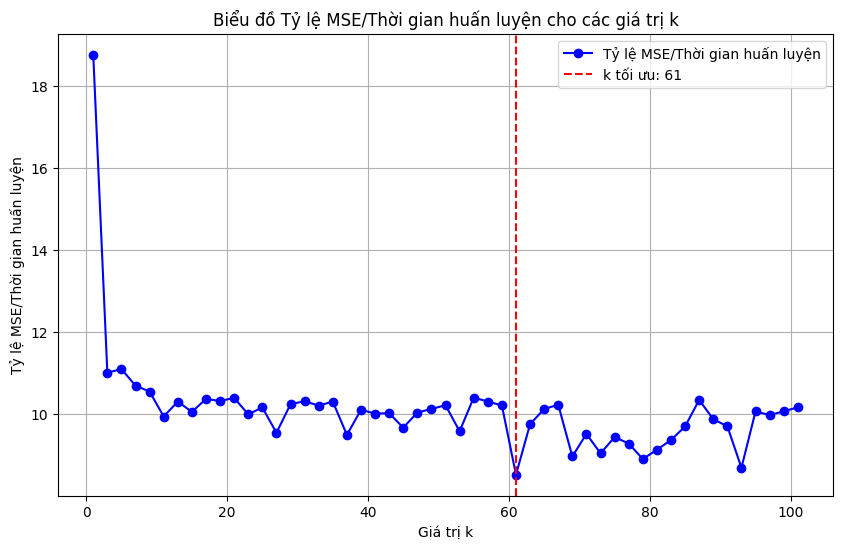

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Tính tỷ lệ giữa MSE và thời gian huấn luyện
ratios = np.array(errors) / np.array(train_times)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(k_range, ratios, marker='o', linestyle='-', color='b', label='Tỷ lệ MSE/Thời gian huấn luyện')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'k tối ưu: {optimal_k}')

# Tiêu đề và nhãn
plt.title('Biểu đồ Tỷ lệ MSE/Thời gian huấn luyện cho các giá trị k')
plt.xlabel('Giá trị k')
plt.ylabel('Tỷ lệ MSE/Thời gian huấn luyện')
plt.legend()
plt.grid(True)
plt.show()

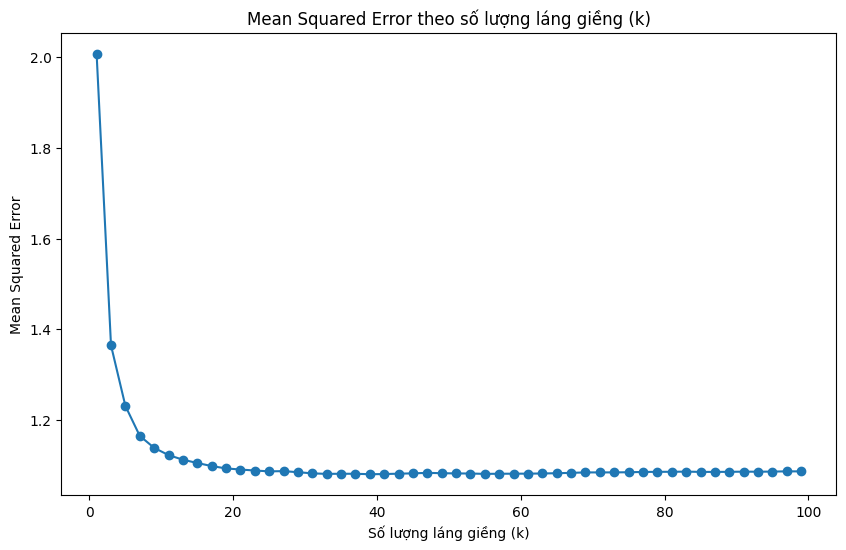

In [8]:
errors = []
k_values = range(1, 101, 2)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    mse_k = mean_squared_error(y_test, y_pred_k)
    errors.append(mse_k)

# Vẽ biểu đồ lỗi theo các giá trị k
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Mean Squared Error theo số lượng láng giềng (k)')
plt.xlabel('Số lượng láng giềng (k)')
plt.ylabel('Mean Squared Error')
plt.show()

Optimal Mean Squared Error (MSE): 1.0820457767819085
Optimal R-squared (R²): 0.4170677388398595


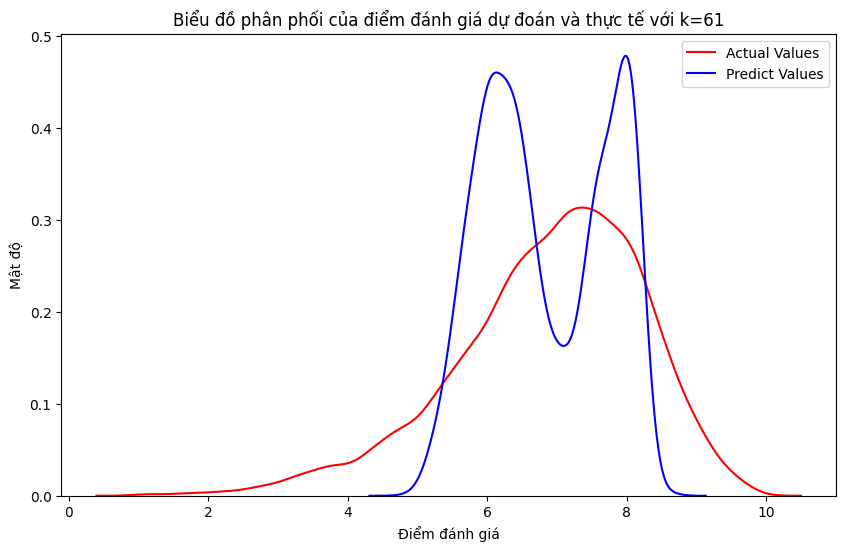

In [11]:
# Khởi tạo mô hình KNN với k=61
knn_optimal = KNeighborsRegressor(n_neighbors=61)
knn_optimal.fit(X_train_scaled, y_train)
y_pred_optimal = knn_optimal.predict(X_test_scaled)

# Đánh giá mô hình với k=61
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
r2_optimal = r2_score(y_test, y_pred_optimal)

print('Optimal Mean Squared Error (MSE):', mse_optimal)
print('Optimal R-squared (R²):', r2_optimal)

# Dự đoán giá trị trên bộ dữ liệu kiểm tra
y_pred_optimal_selected = knn_optimal.predict(X_test_scaled)

# Làm sạch dữ liệu test
y_test = pd.to_numeric(y_test, errors='coerce')
y_pred_optimal_selected = pd.to_numeric(y_pred_optimal_selected, errors='coerce')

valid_mask = np.isfinite(y_test) & np.isfinite(y_pred_optimal_selected)
y_test_clean = y_test[valid_mask]
y_pred_optimal_clean = y_pred_optimal_selected[valid_mask]

# Vẽ biểu đồ phân phối
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test_clean, color='red', label='Actual Values')
sns.kdeplot(y_pred_optimal_clean, color='blue', label='Predict Values')
plt.title('Biểu đồ phân phối của điểm đánh giá dự đoán và thực tế với k=61')
plt.xlabel('Điểm đánh giá')
plt.ylabel('Mật độ')
plt.legend()
plt.show()